Graduate Admission

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv


In [117]:
!pip install pandas numpy matplotlib seaborn scikit-learn keras tensorflow kaggle

In [118]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [119]:
# Use Kaggle API to download the dataset
!kaggle datasets download -d mohansacharya/graduate-admissions

# Unzip the dataset
import zipfile
with zipfile.ZipFile('graduate-admissions.zip', 'r') as zip_ref:
    zip_ref.extractall('')

# Load the dataset
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
License(s): CC0-1.0
graduate-admissions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [120]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [121]:
# Display the first few rows of the dataset
data.head()

# Get some basic information about the dataset
data.info()

# Summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [122]:
# Drop the 'Serial No.' column as it is not useful for prediction
data = data.drop(['Serial No.'], errors='ignore', axis=1)

data = pd.read_csv('Admission_Predict.csv')

# Drop the column 'Serial No.' if it exists
data = data.drop(columns=['Serial No.'], errors='ignore')

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [123]:
# Load the dataset
data = pd.read_csv("Admission_Predict.csv")

# Adjust according to the exact column name
X = data.drop(["Chance of Admit ", "Serial No."], axis=1)
y = data["Chance of Admit "]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 0.004617003377285005
R-Squared: 0.8212082591486993


In [125]:
# Creating a Sequential Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
8/8 - 0s - 14ms/step - loss: 0.0092 - mae: 0.0751 - val_loss: 0.0104 - val_mae: 0.0782
Epoch 2/100
8/8 - 0s - 13ms/step - loss: 0.0127 - mae: 0.0888 - val_loss: 0.0107 - val_mae: 0.0801
Epoch 3/100
8/8 - 0s - 16ms/step - loss: 0.0118 - mae: 0.0866 - val_loss: 0.0145 - val_mae: 0.0919
Epoch 4/100
8/8 - 0s - 8ms/step - loss: 0.0153 - mae: 0.0992 - val_loss: 0.0244 - val_mae: 0.1299
Epoch 5/100
8/8 - 0s - 9ms/step - loss: 0.0235 - mae: 0.1248 - val_loss: 0.0358 - val_mae: 0.1674
Epoch 6/100
8/8 - 0s - 10ms/step - loss: 0.0277 - mae: 0.1367 - val_loss: 0.0430 - val_mae: 0.1878
Epoch 7/100
8/8 - 0s - 10ms/step - loss: 0.0224 - mae: 0.1233 - val_loss: 0.0198 - val_mae: 0.1134
Epoch 8/100
8/8 - 0s - 8ms/step - loss: 0.0151 - mae: 0.0985 - val_loss: 0.0184 - val_mae: 0.1079
Epoch 9/100
8/8 - 0s - 20ms/step - loss: 0.0122 - mae: 0.0881 - val_loss: 0.0132 - val_mae: 0.0863
Epoch 10/100
8/8 - 0s - 13ms/step - loss: 0.0114 - mae: 0.0845 - val_loss: 0.0119 - val_mae: 0.0853
Epoch 11/100

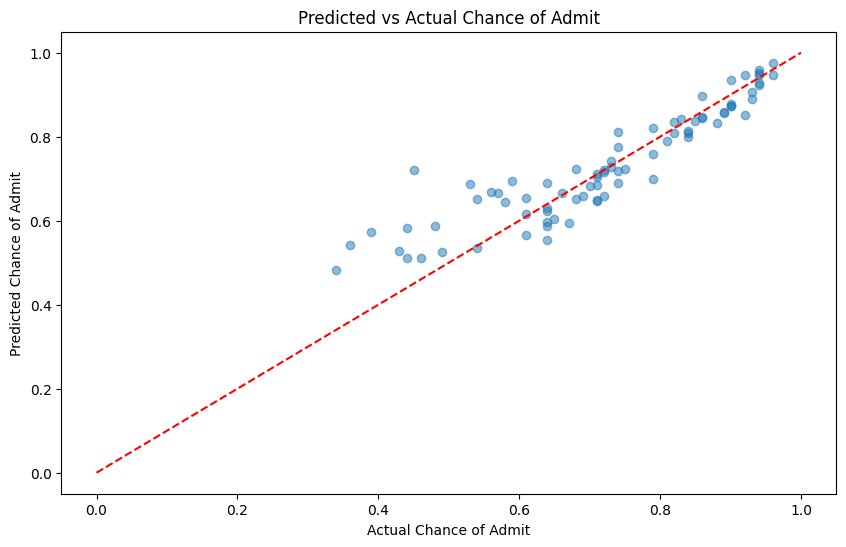

Actual: 0.68, Predicted: 0.6511744621562403
Actual: 0.68, Predicted: 0.7236874052880304
Actual: 0.9, Predicted: 0.9353680948898282
Actual: 0.79, Predicted: 0.8216431599284457
Actual: 0.44, Predicted: 0.5815867330167592
Actual: 0.94, Predicted: 0.9286301577067626
Actual: 0.43, Predicted: 0.5268236567111317
Actual: 0.36, Predicted: 0.5430899321465712
Actual: 0.72, Predicted: 0.659405829089416
Actual: 0.85, Predicted: 0.8383492373472488


In [135]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Predicted vs Actual Chance of Admit')
plt.show()
# Print some example predictions
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")

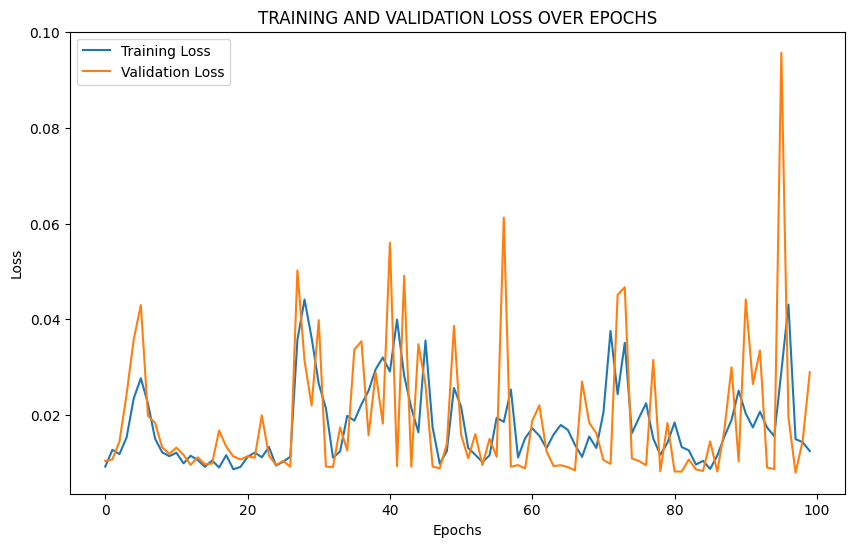

In [136]:
# Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('TRAINING AND VALIDATION LOSS OVER EPOCHS')
plt.legend()
plt.show()

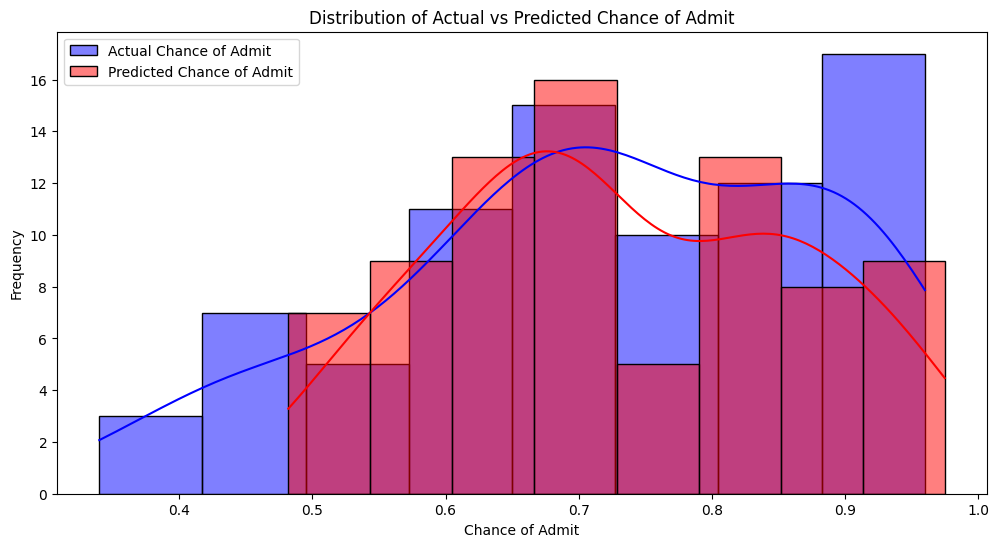

In [137]:
# Distribution of Predictions vs Actual Values
plt.figure(figsize=(12, 6))
sns.histplot(y_test, color='blue', label='Actual Chance of Admit', kde=True)
sns.histplot(y_pred.flatten(), color='red', label='Predicted Chance of Admit', kde=True)
plt.title('Distribution of Actual vs Predicted Chance of Admit')
plt.xlabel('Chance of Admit')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [138]:
# Save the model using the recommended Keras format
model.save('admission_prediction_model.keras')

# Load the model using the Keras format
# loaded_model = tf.keras.models.load_model('admission_prediction_model.keras')